In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [72]:
mydata=pd.read_excel('Height-Weight-dataset.csv.xlsx')

In [73]:
mydata


,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801
...,...,...
3496,69.296830,185.649086
3497,70.542201,210.198845
3498,73.912549,202.429960
3499,67.396021,144.277671


In [74]:
mydata.shape

(3501, 2)

In [75]:
mydata.describe()

,Height,Weight
count,3501.000000,3501.000000
mean,69.024411,186.891258
std,2.858583,19.903132
min,59.380650,65.780000
25%,67.193523,173.896237
50%,69.044211,187.308370
75%,70.976491,200.356448
max,78.998742,269.989698


In [76]:
mydata.isnull().sum()

Height    0
Weight    0
dtype: int64

In [77]:
mydata.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [78]:
mydata.tail()

,Height,Weight
3496,69.296830,185.649086
3497,70.542201,210.198845
3498,73.912549,202.429960
3499,67.396021,144.277671
3500,72.738970,187.222909


In [79]:
mydata['Height'].head()

0    73.847017
1    68.781904
2    74.110105
3    71.730978
4    69.881796
Name: Height, dtype: float64

In [82]:
mydata.Weight.head(5)

0    241.893563
1    162.310473
2    212.740856
3    220.042470
4    206.349801
Name: Weight, dtype: float64

In [83]:
mydata[10:15]

,Height,Weight
10,71.195382,186.604926
11,71.640805,213.741170
12,64.766329,167.127461
13,69.283070,189.446181
14,69.243732,186.434168


In [84]:
mydata.mean()

Height     69.024411
Weight    186.891258
dtype: float64

In [85]:
mydata.Height.mean()

69.02441087268797

In [86]:
mydata.Weight.mean()

186.89125797946284

In [87]:
mydata.Height.std()

2.8585833281420983

In [88]:
row,col=mydata.shape

In [89]:
row

3501

Text(0.5, 1.0, 'Height-weight Scatter Graph')

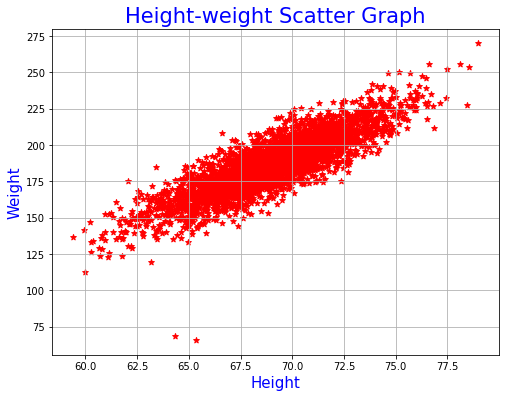

In [153]:
plt.figure(figsize=(8,6))
plt.grid()
plt.scatter(mydata.Height,mydata.Weight,marker='*',color='RED')
plt.xlabel('Height',color='Blue',size='15')
plt.ylabel('Weight',color='Blue',size='15')
plt.title('Height-weight Scatter Graph',color='Blue',size='21')

In [131]:
x=mydata[['Height']]
y=mydata['Weight']

In [100]:
x.head()

,Height
0,73.847017
1,68.781904
2,74.110105
3,71.730978
4,69.881796


# Split the data set into training and test data set

In [132]:
from sklearn.model_selection import train_test_split as tts

In [133]:
x_train,x_test,y_train,y_test= tts(x,y,test_size=.30)

In [104]:
x_train.head()

,Height
3319,69.133081
362,64.955078
2941,71.918302
1281,67.201963
1405,69.877147


In [105]:
y_train.head()

3319    192.172137
362     156.544786
2941    203.846582
1281    174.440823
1405    217.994840
Name: Weight, dtype: float64

In [134]:
from sklearn.linear_model import LinearRegression 

In [135]:
reg=LinearRegression()

In [136]:
reg.fit(x_train,y_train)

LinearRegression()

In [137]:
m=reg.coef_
m

array([5.95839325])

In [138]:
c=reg.intercept_
c

-224.3342612143766

In [139]:
x1=88.56

In [140]:
y=m*x1+c
y

array([303.34104473])

In [141]:
reg.predict([[x1]])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([303.34104473])

In [142]:
pred=reg.predict(x_test)
pred

array([133.06127855, 201.47712986, 181.70414681, ..., 172.04960196,
       218.60517815, 178.14965827])

In [143]:
mydata['Predict Result']=reg.predict(x)

In [144]:
mydata

,Height,Weight,Predict Result
0,73.847017,241.893563,215.675306
1,68.781904,162.310473,185.495371
2,74.110105,212.740856,217.242890
3,71.730978,220.042470,203.067116
4,69.881796,206.349801,192.048959
...,...,...,...
3496,69.296830,185.649086,188.563502
3497,70.542201,210.198845,195.983915
3498,73.912549,202.429960,216.065772
3499,67.396021,144.277671,177.237734


In [145]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [146]:
mse=mean_squared_error(y_test,pred)

In [147]:
mse

104.90777936016495

In [148]:
mae=mean_absolute_error(y_test,pred)

In [149]:
mae

8.222276575363486

# Best Fit Line

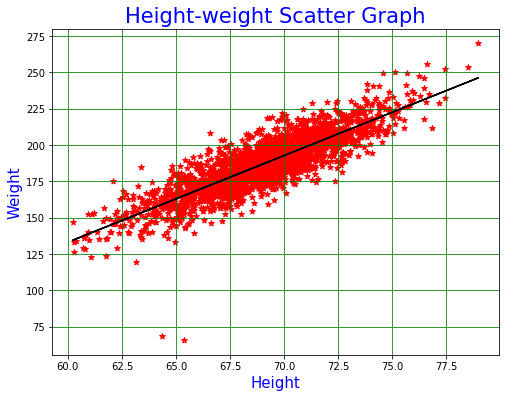

In [177]:
plt.figure(figsize=(8,6))
plt.grid(color='green')
plt.scatter(x_train,y_train,marker='*',color='RED')
plt.xlabel('Height',color='Blue',size='15')
plt.ylabel('Weight',color='Blue',size='15')
plt.title('Height-weight Scatter Graph',color='Blue',size='21')
plt.plot(x_train.squeeze(),reg.predict(x_train),color='Black')

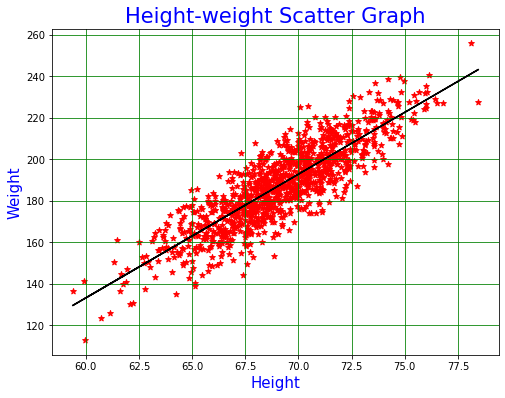

In [178]:
plt.figure(figsize=(8,6))
plt.grid(color='green')
plt.scatter(x_test,y_test,marker='*',color='RED')
plt.xlabel('Height',color='Blue',size='15')
plt.ylabel('Weight',color='Blue',size='15')
plt.title('Height-weight Scatter Graph',color='Blue',size='21')
plt.plot(x_test.squeeze(),reg.predict(x_test),color='Black')

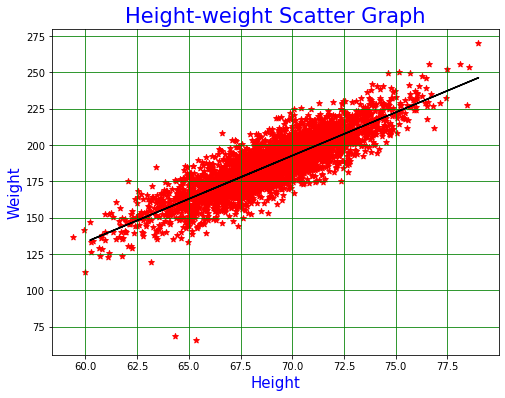

In [174]:
plt.figure(figsize=(8,6))
plt.grid(color='green')
plt.scatter(mydata.Height,mydata.Weight,marker='*',color='RED')
plt.xlabel('Height',color='Blue',size='15')
plt.ylabel('Weight',color='Blue',size='15')
plt.title('Height-weight Scatter Graph',color='Blue',size='21')
plt.plot(x_train.squeeze(),reg.predict(x_train),color='Black')

In [181]:
reg.score(x_test,y_test)

0.7374932414766389